<a href="https://colab.research.google.com/github/Shaanvitha/installing-matplotlib_seaborn_numpy/blob/main/aissignment_6%5BMLR1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')
# Display the first few rows of the dataset
df.head(), df.describe(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


(   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
 0  13500         23  46986    Diesel  90          0  2000      3          4   
 1  13750         23  72937    Diesel  90          0  2000      3          4   
 2  13950         24  41711    Diesel  90          0  2000      3          4   
 3  14950         26  48000    Diesel  90          0  2000      3          4   
 4  13750         30  38500    Diesel  90          0  2000      3          4   
 
    Gears  Weight  
 0      5    1165  
 1      5    1165  
 2      5    1165  
 3      5    1165  
 4      5    1170  ,
               Price    Age_08_04             KM           HP    Automatic  \
 count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
 mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
 std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
 min     4350.000000     1.000000       1.000000    69.000000     0.000000   
 25%   

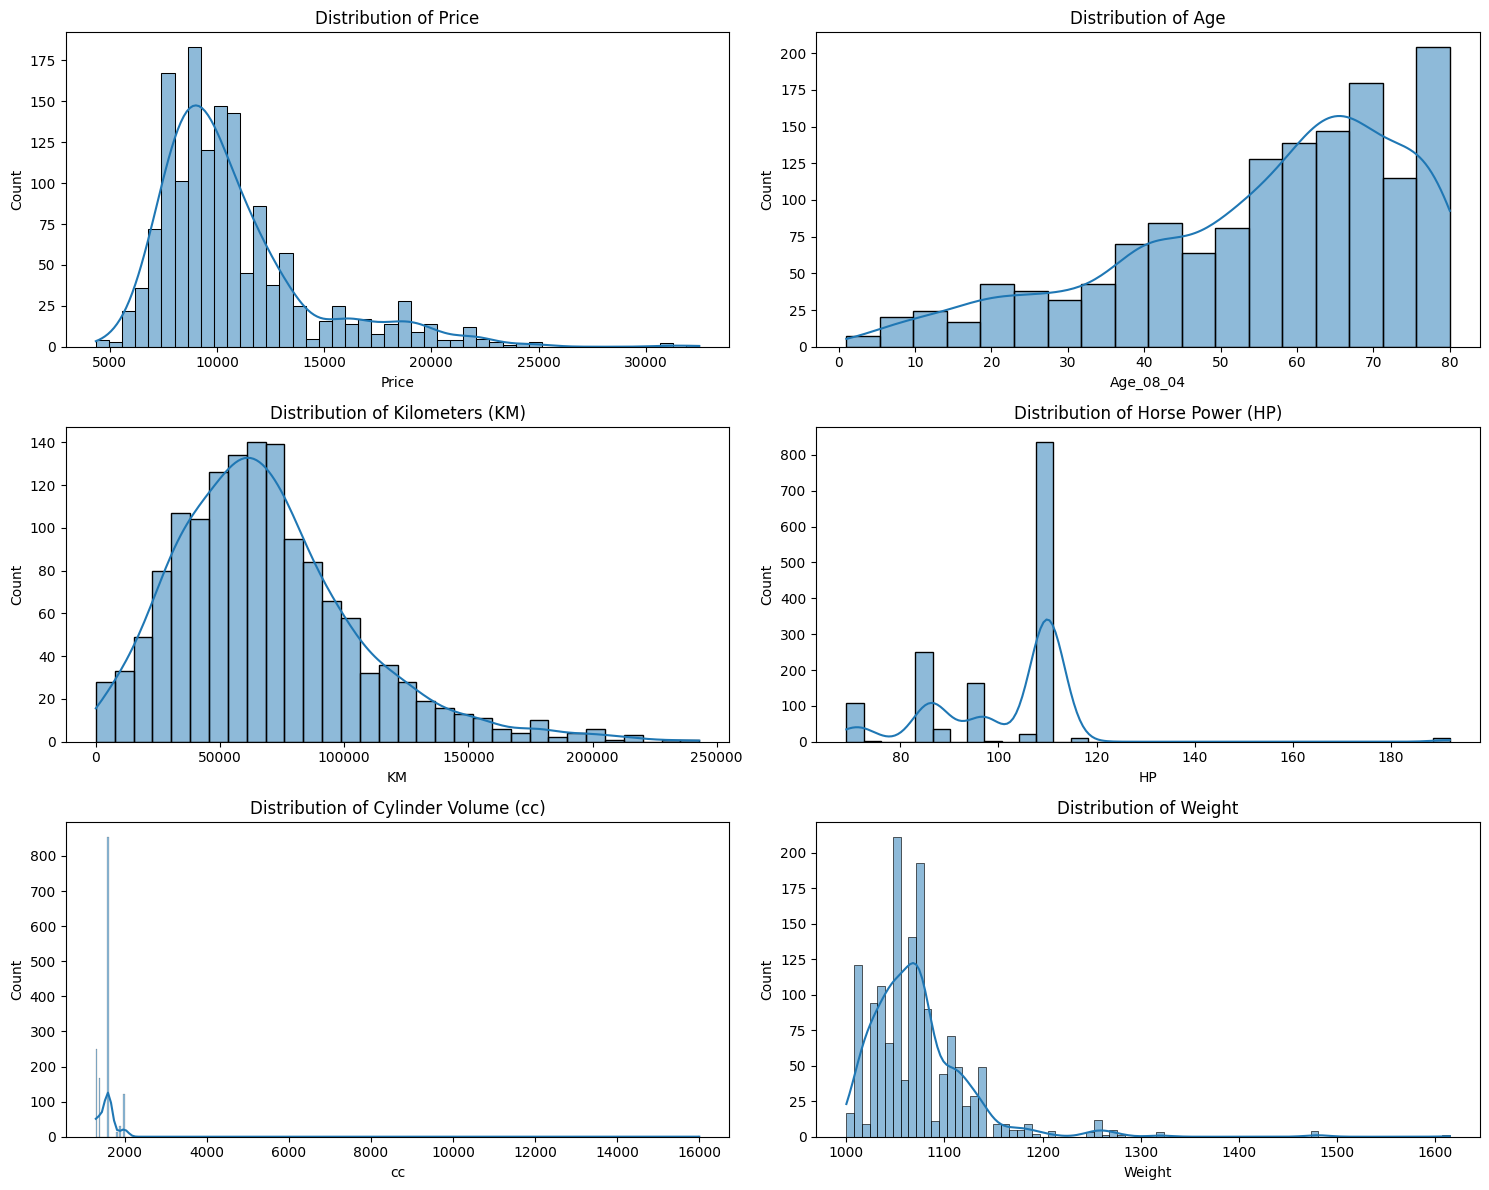

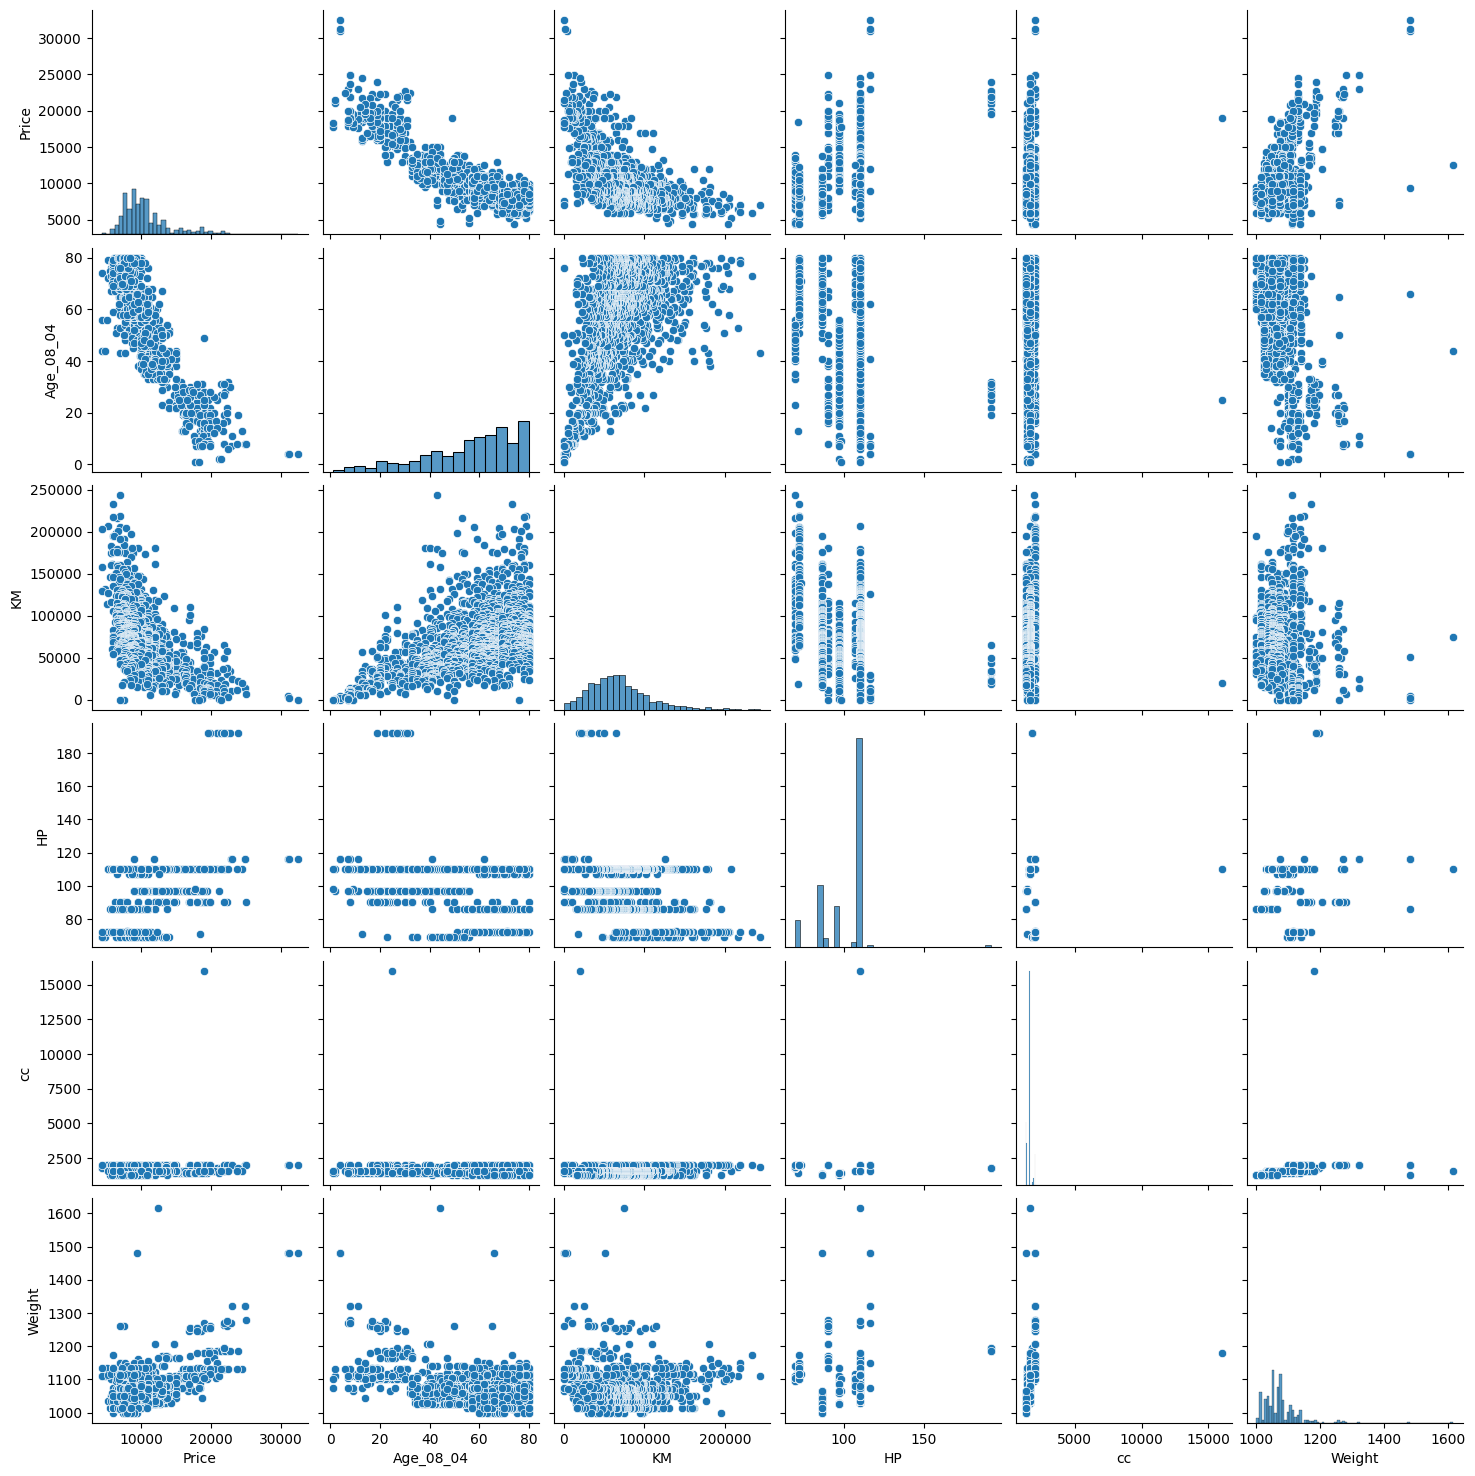

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions of numerical variables
plt.figure(figsize=(15, 12))

# Subplot for Price distribution
plt.subplot(3, 2, 1)
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')

# Subplot for Age distribution
plt.subplot(3, 2, 2)
sns.histplot(df['Age_08_04'], kde=True)
plt.title('Distribution of Age')

# Subplot for KM distribution
plt.subplot(3, 2, 3)
sns.histplot(df['KM'], kde=True)
plt.title('Distribution of Kilometers (KM)')

# Subplot for HP distribution
plt.subplot(3, 2, 4)
sns.histplot(df['HP'], kde=True)
plt.title('Distribution of Horse Power (HP)')

# Subplot for cc distribution
plt.subplot(3, 2, 5)
sns.histplot(df['cc'], kde=True)
plt.title('Distribution of Cylinder Volume (cc)')

# Subplot for Weight distribution
plt.subplot(3, 2, 6)
sns.histplot(df['Weight'], kde=True)
plt.title('Distribution of Weight')

plt.tight_layout()
plt.show()

# Pairplot for selected variables to explore relationships
sns.pairplot(df[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']])
plt.show()


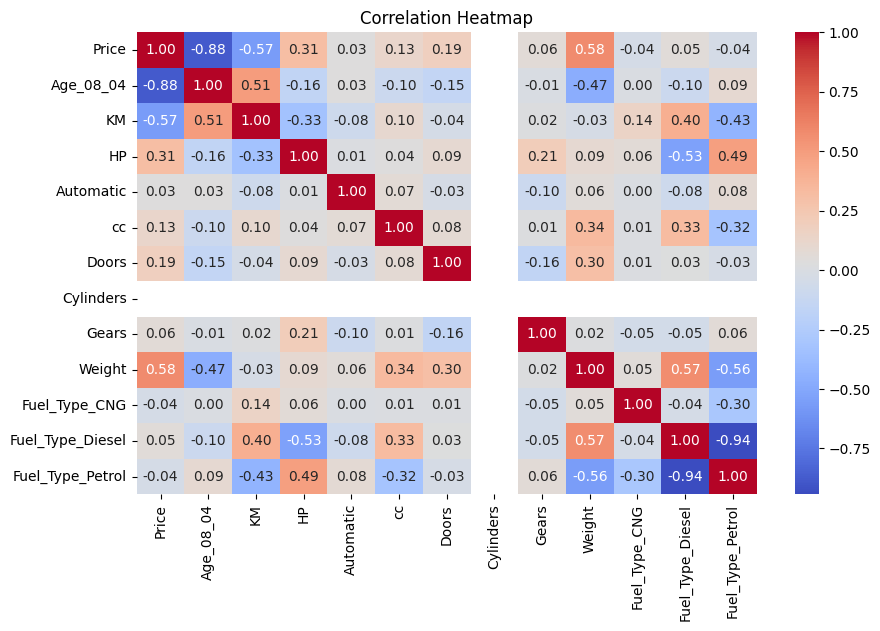

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.get_dummies(df, columns=['Fuel_Type'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('ToyotaCorolla - MLR.csv')

# Drop irrelevant columns and preprocess as needed (dummy variables, handle missing data, etc.)
data = pd.get_dummies(data, drop_first=True)

# Split the data
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline Model
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
y_pred = lm.predict(X_test_scaled)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Feature Selection using RFE
selector = RFE(lm, n_features_to_select=5)
selector = selector.fit(X_train_scaled, y_train)
selected_features = X.columns[selector.support_]

print("Selected Features:", selected_features)

# Fit model with selected features
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

lm.fit(X_train_sel, y_train)
y_pred_sel = lm.predict(X_test_sel)

print("R2 Score with Selected Features:", r2_score(y_test, y_pred_sel))
print("MSE with Selected Features:", mean_squared_error(y_test, y_pred_sel))

# Adding Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_sel)
X_test_poly = poly.transform(X_test_sel)

lm.fit(X_train_poly, y_train)
y_pred_poly = lm.predict(X_test_poly)

print("R2 Score with Polynomial Features:", r2_score(y_test, y_pred_poly))
print("MSE with Polynomial Features:", mean_squared_error(y_test, y_pred_poly))


R2 Score: 0.8348888040611081
MSE: 2203043.8231437043
Selected Features: Index(['Age_08_04', 'KM', 'HP', 'Weight', 'Fuel_Type_Petrol'], dtype='object')
R2 Score with Selected Features: 0.8336374558998443
MSE with Selected Features: 2219740.297429403
R2 Score with Polynomial Features: 0.844143262301642
MSE with Polynomial Features: 2079563.540977404


In [3]:
# Lasso Regression
lasso = Lasso(alpha=0.1)  # You can adjust alpha to control regularization strength
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("R2 Score with Lasso:", r2_score(y_test, y_pred_lasso))
print("MSE with Lasso:", mean_squared_error(y_test, y_pred_lasso))

# Ridge Regression
ridge = Ridge(alpha=1)  # You can adjust alpha to control regularization strength
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("R2 Score with Ridge:", r2_score(y_test, y_pred_ridge))
print("MSE with Ridge:", mean_squared_error(y_test, y_pred_ridge))

# Compare coefficients
print("Linear Model Coefficients:", lm.coef_)
print("Lasso Model Coefficients:", lasso.coef_)
print("Ridge Model Coefficients:", ridge.coef_)


R2 Score with Lasso: 0.8349116135580272
MSE with Lasso: 2202739.480842682
R2 Score with Ridge: 0.8350462635431573
MSE with Ridge: 2200942.8745232844
Linear Model Coefficients: [ 0.00000000e+00  9.07567497e+02 -2.61514380e-01  7.14960331e+00
  3.33510823e+01 -1.93397653e+04  3.06660589e-04 -2.07031500e-01
 -9.01896208e-01 -5.25794264e+01 -2.06361549e-04  2.13944937e-04
  2.43237715e-02  3.52357084e-02 -5.61619974e+00  1.94823286e+01]
Lasso Model Coefficients: [-2267.27035325  -611.71048543   208.46018035    34.33563064
   -14.04428476   -57.28823708     0.           109.26803766
  1316.40520977   -21.48431939   457.89124117]
Ridge Model Coefficients: [-2265.00134477  -613.35953393   209.51163834    34.5626656
   -14.01720176   -56.6392258      0.           109.44104993
  1314.4755365    -22.63285265   453.92669153]


Interview Questions
Normalization & Standardization:

Normalization: Rescaling the data to a range [0,1] or [-1,1]. Useful when you need to bound the input feature.
Standardization: Rescaling data to have a mean of 0 and a standard deviation of 1. Useful when dealing with features that have different units or ranges.
Importance: Both techniques help in improving the convergence of gradient-based optimization algorithms, reducing the impact of outliers, and ensuring that all features contribute equally to the model.
Techniques to Address Multicollinearity:

Variance Inflation Factor (VIF): Identify and remove variables with high VIF values.
Regularization: Apply Ridge regression, which penalizes large coefficients, thereby reducing multicollinearity.
Principal Component Analysis (PCA): Reduce the dimensionality of the data by transforming the correlated variables into a set of linearly uncorrelated variables.